<table style="width:100%" border="0">
    <col width="20%">
    <col width="60%">
    <col width="20%">
    <tr></tr>
    <tr>
        <th style="text-align:left"><img src="Images/UNAM_logo.jpg" width="150px"></th>
        <th style="text-align:center"><span style="font-size:220%">Física Computacional</span><br/><br/><span style="font-size:150%">Tarea 15</span></th> 
        <th style="text-align:right"><img src="Images/LogoCiencias.jpg" width="170px"></th>
    </tr>
</table>

In [1]:
using PyPlot;

En este notebook se incluye nuestra librería `herramnientas.jl` con distintas funciones y su respectiva documentación. Se realizan pequeños test para comprobar que funcionan.

In [2]:
include("Modulos/herramientas.jl");

## 1. `metodo_newton`

In [3]:
?herramientas.metodo_newton

Estima el valor de las raíces de una función $\:f$, i.e. los valores de $x$ para los cuales $\:f(x)=0$, utilizando el método de Newton, `metodo_newton`$(\:f,\mathbf{x}_{0})$ necesita de dos argumentos: la función $\:f$ y una condición inicial $\mathbf{x}_{0}$ la cual entre más cercana sea a una raíz de $\:f$, la convergencia del método será más rápida. Dicha condición inicial $\mathbf{x}_{0}$ convergerá a la raíz de $\:f$ que se encuentre más cerca. Además $\mathbf{x}_{0}$ puede ser un vector y la función regresará un vector con raíces de $\:f$ no repetidas.


Por ejemplo, para hallar una raíz de $\:f(x)=x-10\log(x)$:

In [4]:
herramientas.metodo_newton(x->x-10*log(x),1)[1]

1.1183255915896297

O para encontrar las raíces de $\:f(x)=\mathrm{sen}\:(x)$ en el intervalos $[0,10]$:

In [5]:
mn=herramientas.metodo_newton(x->sin.(x),1:1:6)

4-element Array{Float64,1}:
 6.76063e-227
 3.14159     
 9.42478     
 6.28319     

Dado que el resultado es un vector, la cantidad de cifras significativas se ve limitada en la salida anterior, pero si seleccionamos un elemento se pueden observar más cifras:

In [6]:
mn[3],BigFloat(mn[3])

(9.42477796076938, 9.424777960769379347993890405632555484771728515625000000000000000000000000000000)

Sabemos que $\mathrm{sen}(3\pi)=0$, así que veamos cual es la diferencia entre `3pi` y `mn[3]`:

In [7]:
BigFloat(3pi-mn[3])

0.000000000000000000000000000000000000000000000000000000000000000000000000000000

La diferencia es __muy pequeña__ por lo menos menor a $10^{-78}$, esto es evidente con `mn[1]=6.760629748569151e-227` que no estrictamente 0 pero el error absoluto es del orden de $10^{-227}$, así que `mn[1]` es prácticamente un 0. La precisión de `metodo_newton` se debe a que utiliza para aproximar la derivada a la derivada numérica simétrica de __quinto orden__ cuyo error escala con $h^{6}$.

## 2. `metodo_rectangulo`

In [8]:
?herramientas.metodo_rectangulo

Aproxima la integral de una función $\:f$ sobre $[a,b]$ utilizando el método del rectángulo, `metodo_rectangulo`$(\:f,a,b,n)$ requiere de 4 argumentos: la función $\:f$, los dos extremos del intervalo de integración $a$, $b$ y el número de subintervalos $n$ en los que se dividide el intervalo de integración.


Por ejemplo, para aproximar la integral de $\:f(x)=x^{2}$ en $[3,6]$:

In [9]:
herramientas.metodo_rectangulo(x->x^2,3,6,5)

62.91

Podemos incluso graficar la integral de $f(x)=x^{2}$ en $[-1,1]$:

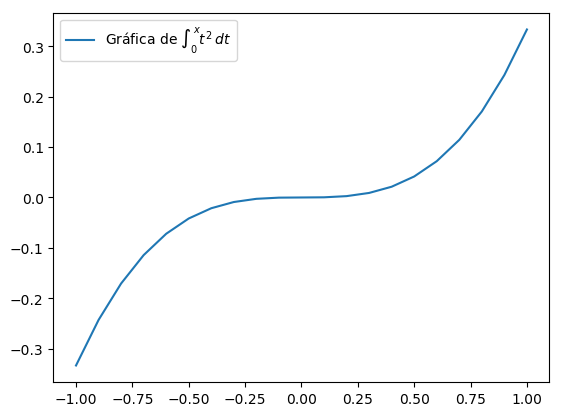

In [10]:
mr(z)=herramientas.metodo_rectangulo(x->x^2,0,z,100)
plot(-1:0.1:1,mr.(-1:0.1:1),label=L"Gráfica de $\int_{0}^{x}t^{2}\:dt$")
legend();

## 3. `metodo_trapecio`

In [11]:
?herramientas.metodo_trapecio

Aproxima la integral de una función $\:f$ sobre $[a,b]$ utilizando el método del trapecio, `metodo_trapecio`$(\:f,a,b,n)$ requiere de 4 argumentos: la función $\:f$, los dos extremos del intervalo de integración $a$, $b$ y el número de subintervalos $n$ en los que se dividide el intervalo de integración.


Por ejemplo, para aproximar la integral de $\:f(x)=x^{2}$ en $[3,6]$:

In [12]:
herramientas.metodo_trapecio(x->x^2,3,6,5)

63.18000000000001

## 4. `metodo_simpson`

In [13]:
?herramientas.metodo_simpson

Aproxima la integral de una función $\:f$ sobre $[a,b]$ utilizando el método de Simpson, `metodo_simpson`$(\:f,a,b,n)$ requiere de 4 argumentos: la función $\:f$, los dos extremos del intervalo de integración $a$, $b$ y el número de subintervalos $n$ en los que se dividide el intervalo de integración.


Por ejemplo, para aproximar la integral de $\:f(x)=e^{-x^{2}}$ en $[-3,3]$:

In [14]:
herramientas.metodo_simpson(x->exp(-x^2),-3,3,5)

1.7736477333065552

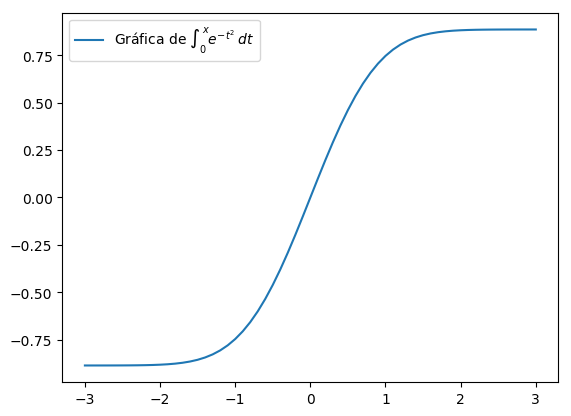

In [15]:
ms(z)=herramientas.metodo_simpson(x->exp(-x^2),0,z,10)
plot(-3:0.1:3,ms.(-3:0.1:3),label=L"Gráfica de $\int_{0}^{x}e^{-t^{2}}\:dt$")
legend();

## 5. `interpolador_lagrange`

In [16]:
?herramientas.interpolador_lagrange

Dados dos vectores $\mathbf{x}$ y $\mathbf{y}$ en $\mathbb{R}^{n}$ (con componentes $x_{k}$ y $y_{k}$, respectivamente), `interpolador_lagrange`$(\mathbf{x},\mathbf{y},x_{0})$ regresa el valor del polinomio de Lagrange $L$ que pasa por los puntos $(x_{k},y_{k})\:\forall k=1,\dots,n$ evaluado en $x_{0}$, i.e. nos da $L(x_{0})$. Si los vectores $\mathbf{x}$ y $\mathbf{y}$ no son de la misma dimensión la función advierte la inconsistencia.


Por ejemplo, si queremos encontrar el polinomio de Lagrange que pasa por los puntos $(0,10)$, $(2,-10)$, $(3,-4)$, $(4,0)$, $(5,5)$, $(6,20)$ y $(7,-1)$:

In [17]:
herramientas.interpolador_lagrange([0,2,3,4,5,6,7],[10,-10,-4,0,5,20,-1],6)

20.0

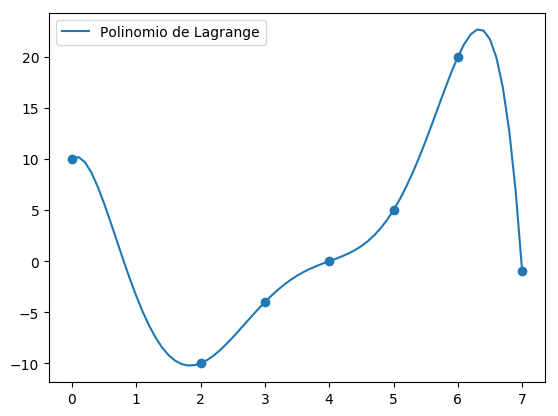

In [18]:
pl(z)=herramientas.interpolador_lagrange([0,2,3,4,5,6,7],[10,-10,-4,0,5,20,-1],z)
scatter([0,2,3,4,5,6,7],[10,-10,-4,0,5,20,-1])
plot(0:0.1:7,pl.(0:0.1:7),label="Polinomio de Lagrange")
legend();

Cuando tenemos dos vectores de diferente dimensión:

In [19]:
herramientas.interpolador_lagrange([1 2],[3 4 5],6)

L"Los vectores $\textbf{no}$ son de la misma dimensión, $\mathbf{x}\in\mathbb{R}^{2}$ y $\mathbf{y}\in\mathbb{R}^{3}$."

## 6. `euler`

In [20]:
?herramientas.euler

La función `euler` utiliza el algoritmo del método de Euler para aproximar la solución del sistema de ecuaciones diferenciales:

$\dfrac{d\mathbf{x}}{dt}=\boldsymbol{f}(\mathbf{x},t)$, con condiciones iniciales $\mathbf{x}(t_{0})=\mathbf{x}_{0}$.

Así `euler`$(\:\boldsymbol{f},t,\mathbf{x}_{0})$ aproxima a $\mathbf{x}$ en $t>t_{0}$ (donde $t$ es una lista de varios tiempos separados $h$). El método de Euler es:

$\mathbf{x}_{k+1}=\mathbf{x}_{k}+h\:\boldsymbol{f}(\mathbf{x}_{k},t_{k})$,

donde $\mathbf{x}_{k}$ es la aproximación de $\mathbf{x}(t_{k})$ y $t_{k}=t_{0}+hk$. Si se tiene $\mathbf{x}(t)=(x_{1}(t),\dots,x_{n}(t))$ con $n>1$, entonces `euler`$(\:\boldsymbol{f},t,\mathbf{x}_{0})$ `[i]` es el vector $(x_{i}(t_{0}),\dots,x_{i}(t_{m}))$, con $m=$ `length`$(t)$; si $n=1$ (i.e. $\mathbf{x}(t)\longrightarrow x(t)$, $\:\boldsymbol{f}\longrightarrow\:f$ ), entonces `euler`$(\:f,t,x_{0})$ es directamente el vector $(x(t_{0}),\dots,x(t_{m}))$.


Encontremos la solución numérica a:

$$\frac{dx}{dt}=\frac{2x-18t}{1+t},\:\:x(0)=4\:\mathrm{en}\:[0,3]:$$

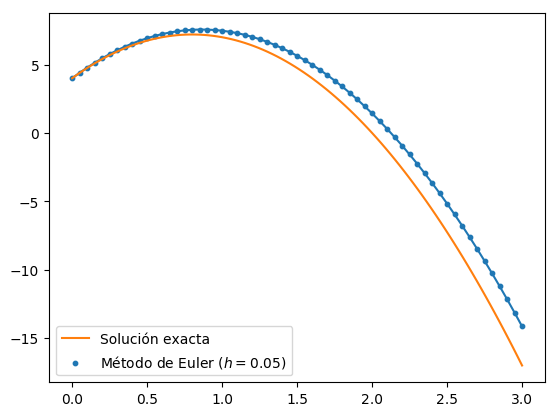

In [21]:
e1(x,t)=(2x-18t)/(1+t)
se1=herramientas.euler(e1,0:0.05:3,4)
s1(t)=-5t.^2+8t+4
scatter(0:0.05:3,se1,label=L"Método de Euler ($h=0.05$)",s=10)
plot(0:0.05:3,se1)
plot(linspace(0,3,100),s1.(linspace(0,3,100)),label="Solución exacta")
legend();

Justo como dice en la documentación de `euler`, como en este caso tenemos una sola ecuación diferencial, entonces `se1` trae directamente el vector solución.

Para la ecuación diferencial:

$$\frac{d^{2}x}{dt^{2}}=-4x,\:\:x(0)=3\:\mathrm{y}\:\dot{x}(0)=4\:\mathrm{en}\:[0,6]$$

Que se puede llevar a

$$\frac{d\mathbf{x}}{dt}=\boldsymbol{f}(\mathbf{x},t),$$

con $\mathbf{x}(t)=(x(t),u(t))$ y $\:\boldsymbol{f}(\mathbf{x},t)=(u(t),-4x(t))$:

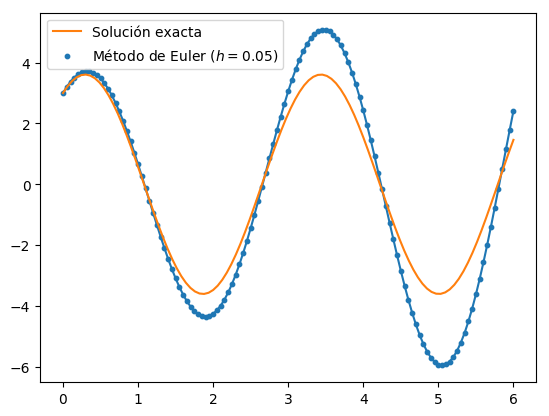

In [22]:
e2(x,t)=[x[2],-4x[1]]
se2=herramientas.euler(e2,0:0.05:6,[3,4])
s2(t)=3*cos(2t)+2*sin(2t)
scatter(0:0.05:6,se2[1],label=L"Método de Euler ($h=0.05$)",s=10)
plot(0:0.05:6,se2[1])
plot(linspace(0,6,100),s2.(linspace(0,6,100)),label="Solución exacta")
legend();

Nuevamente como dice la documentación de `euler`, dado que tenemos un sistema de dos ecuaciones diferenciales, entonces `se2[1]` es el vector solución de $x$, mientras que `se2[2]` es el vector solución de $\dot{x}$.

## 7. `euler_implicito`

In [23]:
?herramientas.euler_implicito

La función `euler_implicito` utiliza el algoritmo del método de Euler implícito para aproximar la solución del sistema de ecuaciones diferenciales:

$\dfrac{d\mathbf{x}}{dt}=\boldsymbol{f}(\mathbf{x},t)$, con condiciones iniciales $\mathbf{x}(t_{0})=\mathbf{x}_{0}$.

Así `euler_implicito`$(\:\boldsymbol{f},t,\mathbf{x}_{0}$,`"metodo"`) aproxima a $\mathbf{x}$ en $t>t_{0}$ (donde $t$ es una lista de varios tiempos separados $h$). El método de Euler implícito es:

$\mathbf{x}_{k+1}=\mathbf{x}_{k}+h\:\boldsymbol{f}(\mathbf{x}_{k+1},t_{k+1})$,

donde $\mathbf{x}_{k}$ es la aproximación de $\mathbf{x}(t_{k})$ y $t_{k}=t_{0}+hk$. Para invertir el sistema algebraico anterior, `euler_implicito` cuenta con dos métodos a elegir en el cuarto argumento de la función (deben de escribirse dentro de las comillas dobles):

  * `metodo`=`newton`: Utiliza el método de Newton para encontrar $\mathbf{x}_{k+1}$.
  * `metodo`=`fijo`: Utiliza el método del punto fijo para encontrar $\mathbf{x}_{k+1}$

El cuarto argumento se puede omitir, en tal caso el método utilizado por defecto es el método de Newton. Si se tiene $\mathbf{x}(t)=(x_{1}(t),\dots,x_{n}(t))$, entonces `euler_implicito`$(\:\boldsymbol{f},t,\mathbf{x}_{0}$,`"metodo"`) `[i]` es el vector $(x_{i}(t_{0}),\dots,x_{i}(t_{m}))$, con $m=$ `length`$(t)$; si $n=1$ (i.e. $\mathbf{x}(t)\longrightarrow x(t)$, $\:\boldsymbol{f}\longrightarrow\:f$ ), entonces `euler_implicito`$(\:f,t,x_{0}$,`"metodo"`) es directamente el vector $(x(t_{0}),\dots,x(t_{m}))$.


Encontremos la solución numérica a:

$$\frac{dx}{dt}=-2.5x,\:\:x(0)=1\:\mathrm{en}\:[0,8]:$$

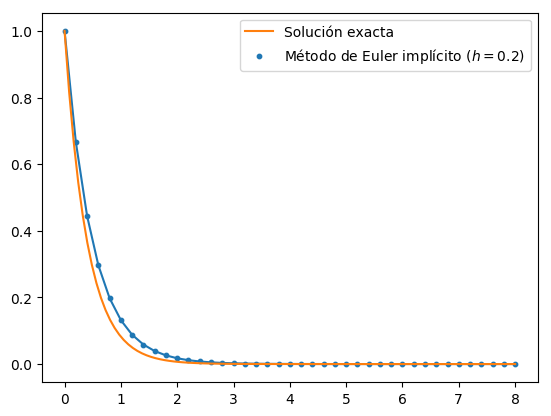

In [27]:
ei1(x,t)=-2.5x
sei1=herramientas.euler_implicito(ei1,0:0.2:8,1,"fijo")
s3(t)=exp(-2.5t)
scatter(0:0.2:8,sei1,label=L"Método de Euler implícito ($h=0.2$)",s=10)
plot(0:0.2:8,sei1)
plot(linspace(0,8,100),s3.(linspace(0,8,100)),label="Solución exacta")
legend();

Para la ecuación diferencial:

$$\frac{d^{2}x}{dt^{2}}=\frac{12t^{4}-12x-2}{5},\:\:x(-3)=40\:\mathrm{y}\:\dot{x}(-3)=-78\:\mathrm{en}\:[-3,3]$$

Que se puede llevar a

$$\frac{d\mathbf{x}}{dt}=\boldsymbol{f}(\mathbf{x},t),$$

con $\mathbf{x}(t)=(x(t),u(t))$ y $\:\boldsymbol{f}(\mathbf{x},t)=\left(u(t),\dfrac{12t^{4}-12x(t)-2}{5}\right)$. Se sabe que la solución analítica es $x(t)=t^{4}-5t^{2}+4$:

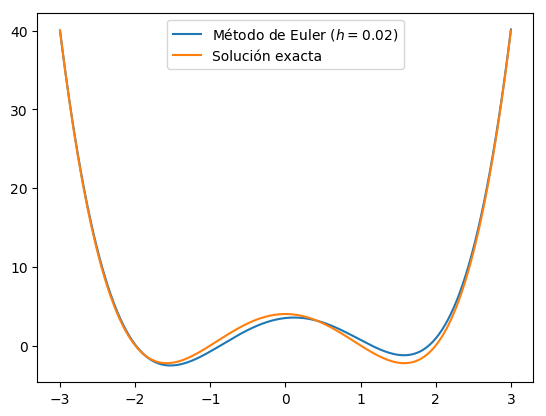

In [28]:
ei2(x,t)=[x[2],(12t^4-12x[1]-2)/5]
sei2=herramientas.euler_implicito(ei2,-3:0.02:3,[40,-78])
s4(t)=t^4-5t^2+4
plot(-3:0.02:3,sei2[1],label=L"Método de Euler ($h=0.02$)")
plot(linspace(-3,3,100),s4.(linspace(-3,3,100)),label="Solución exacta")
legend();

## 8. `RK4`

In [29]:
?herramientas.RK4

La función `RK4` utiliza el algoritmo del método de Runge-Kutta de orden 4 (método RK4) para aproximar la solución del sistema de ecuaciones diferenciales:

$\dfrac{d\mathbf{x}}{dt}=\boldsymbol{f}(\mathbf{x},t)$, con condiciones iniciales $\mathbf{x}(t_{0})=\mathbf{x}_{0}$.

Así `RK4`$(\:\boldsymbol{f},t,\mathbf{x}_{0})$ aproxima a $\mathbf{x}$ en $t>t_{0}$ (donde $t$ es una lista de varios tiempos separados $h$). El método RK4 es:

$\mathbf{x}_{i+1}=\mathbf{x}_{i}+\dfrac{1}{6}h(\mathbf{k}_{1}+2\mathbf{k}_{2}+2\mathbf{k}_{3}+\mathbf{k}_{4})$, donde:

$\mathbf{k}_{1}=\boldsymbol{f}\left(\mathbf{x}_{i},t_{i}\right)$

$\mathbf{k}_{2}=\boldsymbol{f}\left(\mathbf{x}_{i}+\dfrac{1}{2}h\mathbf{k}_{1},t_{i}+\dfrac{1}{2}h\right)$

$\mathbf{k}_{3}=\boldsymbol{f}\left(\mathbf{x}_{i}+\dfrac{1}{2}h\mathbf{k}_{2},t_{i}+\dfrac{1}{2}h\right)$

$\mathbf{k}_{4}=\boldsymbol{f}\left(\mathbf{x}_{i}+h\mathbf{k}_{3},t_{i}+h\right)$

y con $\mathbf{x}_{k}$ la aproximación de $\mathbf{x}(t_{k})$ y $t_{k}=t_{0}+hk$. Si se tiene $\mathbf{x}(t)=(x_{1}(t),\dots,x_{n}(t))$, entonces `RK4`$(\:\boldsymbol{f},t,\mathbf{x}_{0})$ `[i]` es el vector $(x_{i}(t_{0}),\dots,x_{i}(t_{m}))$, con $m=$ `length`$(t)$; si $n=1$ (i.e. $\mathbf{x}(t)\longrightarrow x(t)$, $\:\boldsymbol{f}\longrightarrow\:f$ ), entonces `RK4`$(\:f,t,x_{0})$ es directamente el vector $(x(t_{0}),\dots,x(t_{m}))$.


Con `RK4` hallemos la solución de:

$$\frac{dx}{dt}=-2xt,\:\:x(-2)=e^{-4}\:\mathrm{en}\:[-2,2]:$$

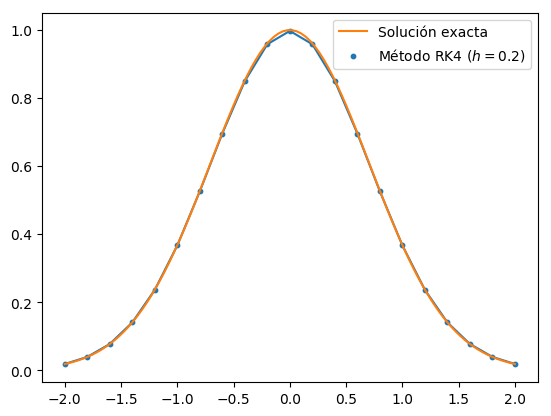

In [30]:
RK2(x,t)=-2x*t
sRK2=herramientas.RK4(RK2,-2:0.2:2,exp(-4))
s5(t)=exp(-t^2)
scatter(-2:0.2:2,sRK2,label=L"Método RK4 ($h=0.2$)",s=10)
plot(-2:0.2:2,sRK2)
plot(linspace(-2,2,100),s5.(linspace(-2,2,100)),label="Solución exacta")
legend();

Encontremos las soluciones del sistema:

$$\begin{array}{l}\dfrac{dx}{dt}=x+y-x(x^{2}+y^{2})\\\dfrac{dy}{dt}=-x+y-y(x^{2}+y^{2})\end{array},$$

en el espacio fase para varias condiciones iniciales:

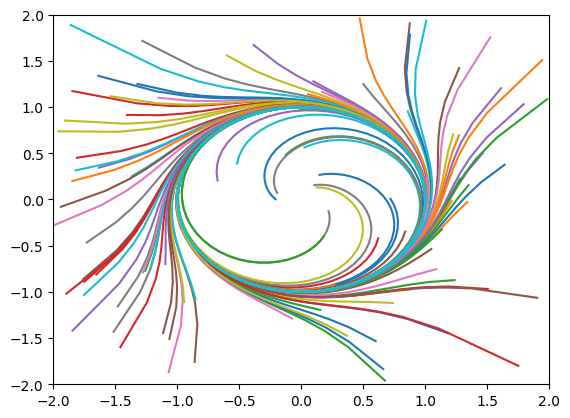

In [31]:
RK(x,t)=[x[1]+x[2]-x[1].*(x[1].^2+x[2].^2),-x[1]+x[2]-x[2].*(x[1].^2+x[2].^2)]
for i in 1:100
    sRK=herramientas.RK4(RK,0:0.1:20,[2*(2*rand(1)-1),2*(2*rand(1)-1)]);
    plot(sRK[1],sRK[2])
    xlim([-2,2])
    ylim([-2,2])
end

<div align="right" style="text-indent:0.5cm">**Alonso Torres Edgar Giovanni**</div>